In [2]:
using Plots
gr()
default(leg=false)

using Distributions

┌ Info: Recompiling stale cache file /Users/john/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240


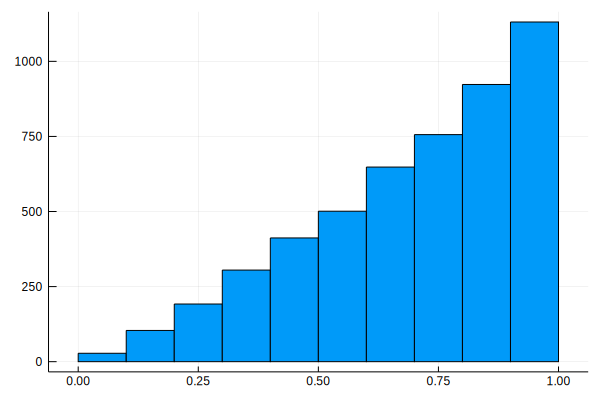

5000 0.9151200569433682 2734

In [17]:
V = 1113 # Number of vikings
R = 1123 # Number of rings

# Winner's f
w = Float64[]

# Deaths per run
d = Int[]

default(show=:inline)
for j in 1:5000
    
# Assign rings evenly to each viking
r = zeros(Int, V)
for i in 1:R
    r[i%V+1] += 1
end

# Assign each viking a fighting skill between 0 and 1
f = 1.0.-rand(Beta(), V)

deaths = 0
for i in 1:12000
    k = rand(1:V)
    l = rand(1:V)

    # Viking k challenges viking l according to collective encoding (number of rings)
    if k!=l && (r[k]!=0 || r[l]!=0) && rand() < r[k] / r[k] + r[l]
    #if f[k] > 0.5
        deaths += 1
        # Win/lose according to actual individual skill, f
        if rand() < f[k] / (f[k] + f[l])
            r[k] = r[k] + r[l]
            r[l] = 0
            #f[l] = rand()
        else
            r[l] = r[k] + r[l]
            r[k] = 0
            #f[k] = rand()
        end
    end
        
    m,_ = findmax(r)
    if m == R
        break
    end
    # Viking with most rings dies and spreads his rings to others
    #for n in 1:m
    #    r[rand(1:V)] += 1
    #end
    #r[m] = 0
    #f[m] = rand()

end

_,m = findmax(r)
push!(w, f[m])
push!(d, deaths)
histogram(w, bins=0:0.1:1)
print(j, " ", f[m], " ", deaths)

end


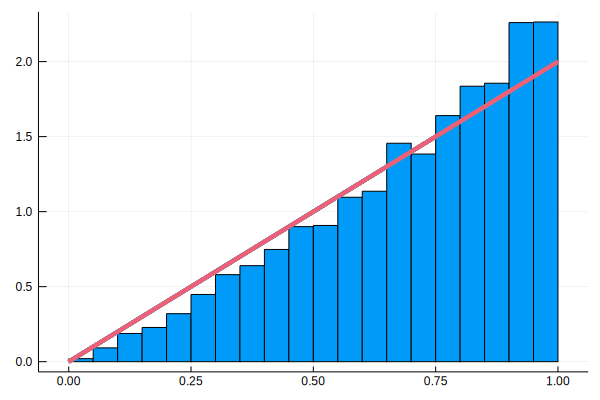

In [45]:
default(show=:nothing)
plot(histogram(w, normed=true))
plot!(p1, 0:0.1:1, 0:0.2:2, lw=4)

In [41]:
dist = fit(Normal, d)

Normal{Float64}(μ=2746.5226, σ=50.829580848556915)

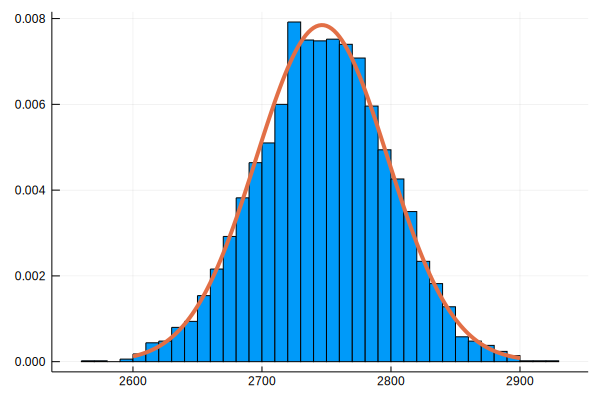

In [33]:
plot(histogram(d, normed=true))
plot!(2600:2:2900, pdf.(dist, 2600:2:2900), lw=4)
